### multiple LinearRegression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
df = pd.read_csv("multiple_linear_regression_dataset.csv")
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


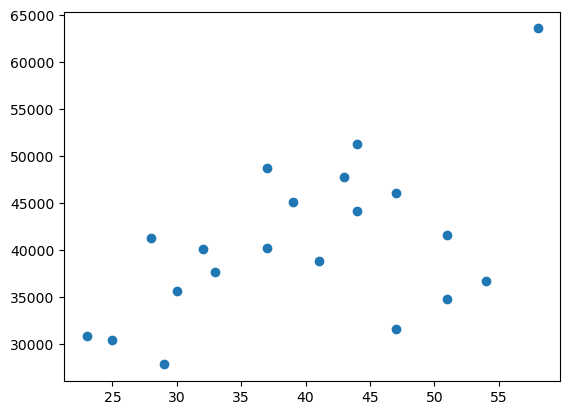

In [6]:
plt.scatter(df["age"],df["income"])

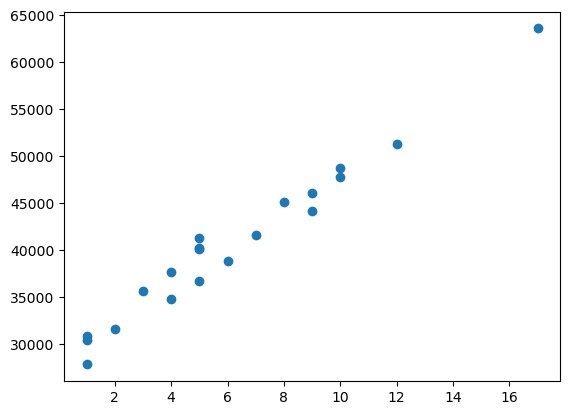

In [7]:
plt.scatter(df["experience"],df["income"])

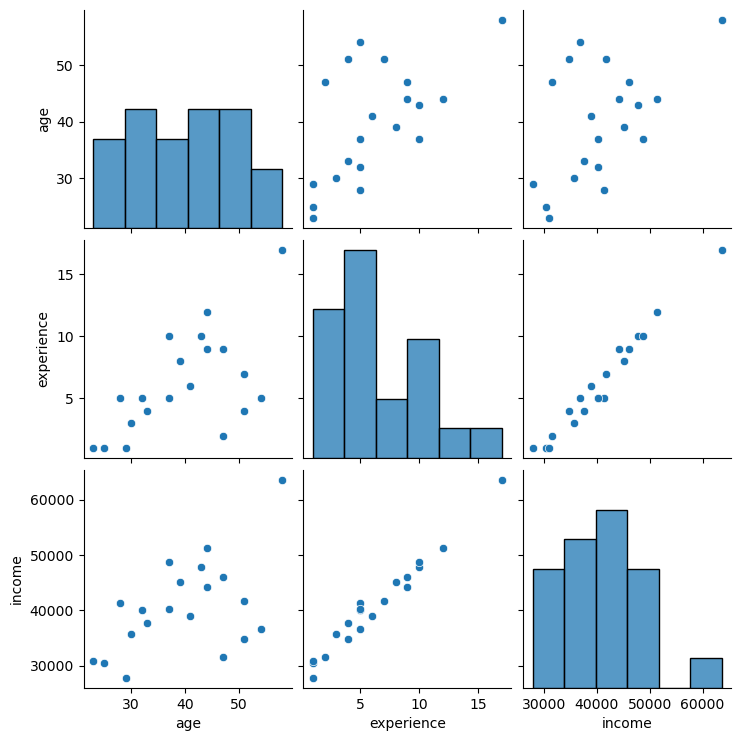

In [9]:
sns.pairplot(df)

In [10]:
df.corr()

,age,experience,income
age,1.000000,0.615165,0.532204
experience,0.615165,1.000000,0.984227
income,0.532204,0.984227,1.000000


<Axes: >

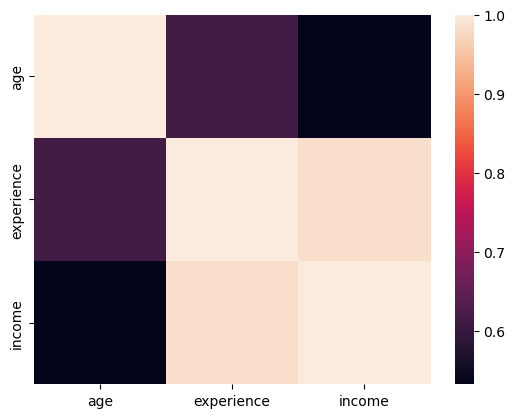

In [16]:
sns.heatmap(df.corr())

In [32]:
x = df[["age","experience"]]
y = df.iloc[:,-1]

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size = 0.25)

In [34]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((15, 2), (15,), (5, 2), (5,))

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [36]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [38]:
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [39]:
y_pred = lr.predict(x_test_scaled)

In [40]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score

In [41]:
print("mse",mean_squared_error(y_test,y_pred))
print("mae",mean_absolute_error(y_test,y_pred))
print("rmse",root_mean_squared_error(y_test,y_pred))
print("r2",r2_score(y_test,y_pred))

mse 1264016.0265139702
mae 926.3665944472953
rmse 1124.284673254052
r2 0.921704518922863


<Axes: xlabel='experience', ylabel='income'>

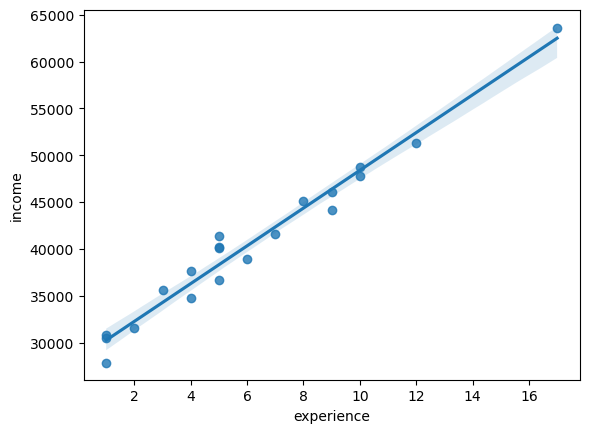

In [43]:
sns.regplot(data = df,x = df["experience"],y = df["income"])

<Axes: xlabel='age', ylabel='income'>

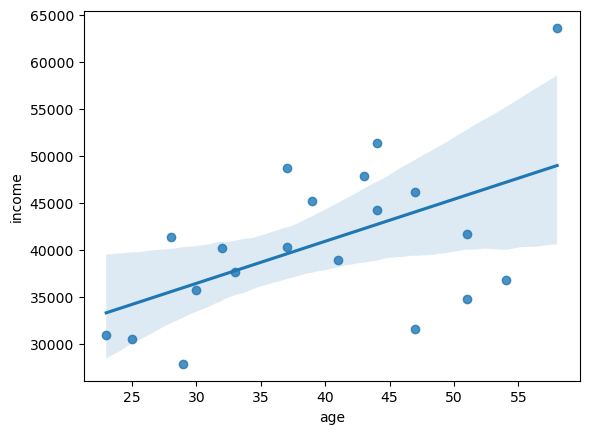

In [44]:
sns.regplot(data = df,x = df["age"],y = df["income"])

In [47]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(lr,x_train_scaled,y_train,scoring="neg_mean_squared_error",cv=3)

In [48]:
np.mean(cvs)

-1914547.221223357

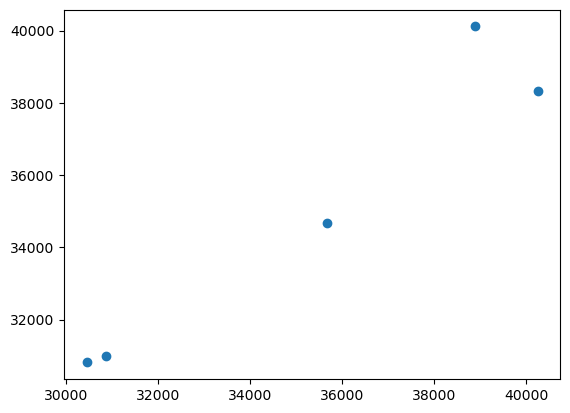

In [49]:
plt.scatter(y_test,y_pred)

In [51]:
reciduals = y_test-y_pred
reciduals

0     -361.241120
17    -131.408816
15   -1213.198014
1     1004.858735
8     1921.126287
Name: income, dtype: float64

/tmp/ipykernel_45123/2545612565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reciduals,kde=True)


<Axes: xlabel='income', ylabel='Density'>

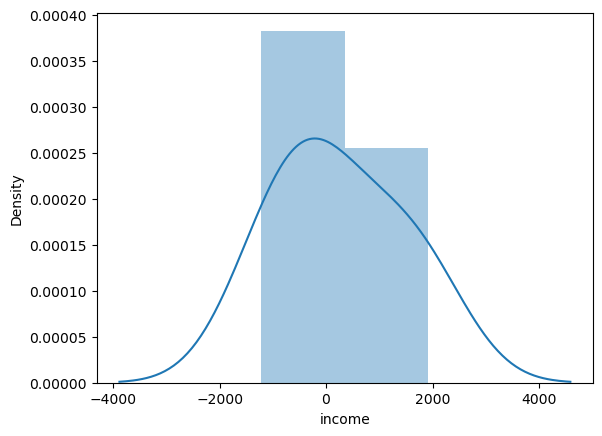

In [53]:
sns.distplot(reciduals,kde=True)